In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Adjust path according to your structure

In [11]:
file_path = './Data/1980sClassics.csv'  
df = pd.read_csv('./data/1980sClassics.csv')

Data Exploration


In [4]:
print(df.head())
print(df.describe())
print(df.info())

                   Track              Artist Duration  Time_Signature  \
0                   Babe                Styx     3:38               4   
1               The Rose        Bette Midler     4:04               4   
2                   Cars          Gary Numan     4:08               4   
3                  Magic  Olivia Newton-John     2:17               4   
4  We Don’t Talk Anymore       Cliff Richard     3:37               4   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.700   0.582   11    -5.960     0       0.0356       0.05020   
1         0.264   0.640    8    -6.221     1       0.0442       0.03930   
2         0.338   0.562    9    -7.181     1       0.0290       0.03900   
3         0.911   0.689    1    -6.176     1       0.2650       0.00119   
4         0.728   0.563    1    -8.053     0       0.1340       0.62100   

   Instrumentalness  Liveness  Valence    Tempo  Popularity  Year  
0          0.000000    0.0881    0.785  11

Visualize the relationship between features and target

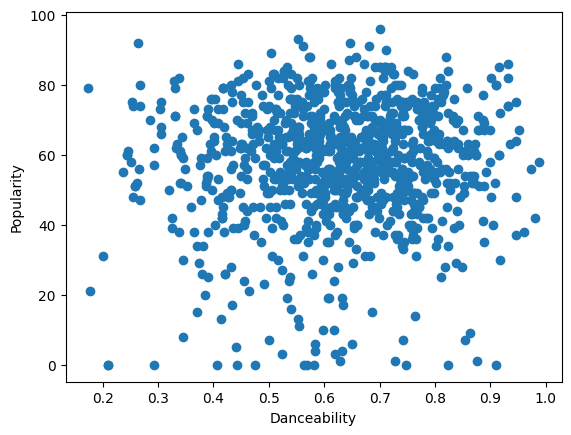

In [5]:
plt.scatter(df['Danceability'], df['Popularity'])
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

Select features and target

In [12]:
df = df.dropna()

X = df[['Danceability', 'Energy', 'Loudness', 'Tempo']]  # Selected features
y = df['Popularity']  


print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

print("\nFirst 5 rows of X (features):")
print(X.head())

print("\nFirst 5 rows of y (target):")
print(y.head())


Shape of X (features): (998, 4)
Shape of y (target): (998,)

First 5 rows of X (features):
   Danceability  Energy  Loudness    Tempo
0         0.700   0.582    -5.960  116.712
1         0.264   0.640    -6.221   84.828
2         0.338   0.562    -7.181  149.907
3         0.911   0.689    -6.176  140.034
4         0.728   0.563    -8.053  100.017

First 5 rows of y (target):
0    96
1    92
2    82
3    80
4    80
Name: Popularity, dtype: int64


Split the data

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (798, 4)
Shape of X_test: (200, 4)
Shape of y_train: (798,)
Shape of y_test: (200,)


Build the model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate the model

In [9]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 13.593348106286076
Mean Squared Error: 345.3805839160879
R-squared: -0.036185142001085024


Visualize the results

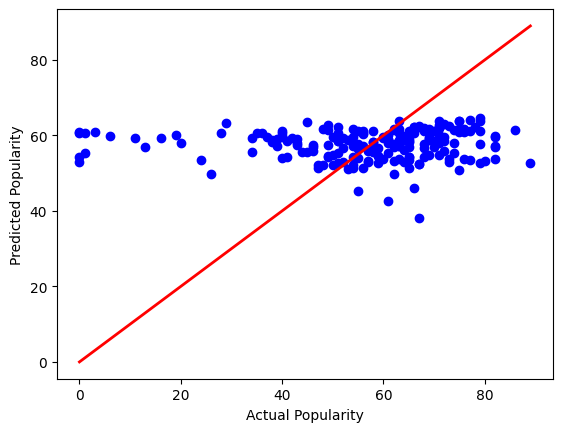

In [10]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()